In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# show all df columns
pd.set_option('display.max_columns', None)


In [15]:
# import train and test data.
train_df = pd.read_pickle("Naive_data/train_df.pkl")
test_df = pd.read_pickle("Naive_data/test_df.pkl")
target_df = pd.read_pickle("Naive_data/target_df.pkl")

In [16]:
target_df.head()

0     20.0
1     28.0
2    130.0
3     34.0
4     24.0
Name: price_trans, dtype: float64

In [17]:
train_df.shape, test_df.shape

((175000, 191), (83210, 191))

In [18]:
test_df.head()

,country,designation,province,region_1,region_2,taster_name,title,variety_col,winery_col,ratings,country_region,has_twit_handle,title_year,no_of_words,country_country,designation_designation,province_province,region_1_region_1,region_2_region_2,taster_name_taster_name,title_title,variety_variety,winery_winery,country_region_country_region,ratings_ratings,country_designation,country_province,country_region_1,country_region_2,country_taster_name,country_title,country_variety,country_winery,country_country_region,country_ratings,country_no_of_words,designation_province,designation_region_1,designation_region_2,designation_taster_name,designation_title,designation_variety,designation_winery,designation_country_region,designation_ratings,designation_no_of_words,province_region_1,province_region_2,province_taster_name,province_title,province_variety,province_winery,province_country_region,province_ratings,province_no_of_words,region_1_region_2,region_1_taster_name,region_1_title,region_1_variety,region_1_winery,region_1_country_region,region_1_ratings,region_1_no_of_words,region_2_taster_name,region_2_title,region_2_variety,region_2_winery,region_2_country_region,region_2_ratings,region_2_no_of_words,taster_name_title,taster_name_variety,taster_name_winery,taster_name_country_region,taster_name_ratings,taster_name_no_of_words,title_variety,title_winery,title_country_region,title_ratings,title_no_of_words,variety_winery,variety_country_region,variety_ratings,variety_no_of_words,winery_country_region,winery_ratings,winery_no_of_words,country_region_ratings,country_region_no_of_words,ratings_no_of_words,acidity,age,also,apple,aromas,balance,balanced,berry,bit,black,blackberry,blend,bodied,bright,cabernet,character,chardonnay,cherries,cherry,chocolate,citrus,clean,cola,complex,creamy,crisp,currant,dark,dried,drink,dry,fine,finish,firm,flavor,flavors,fresh,fruit,fruits,fruity,full,good,green,herb,herbal,juicy,lemon,licorice,light,like,lime,little,long,made,medium,merlot,mineral,mouth,mouthfeel,nose,notes,oak,offers,one,palate,peach,pear,pepper,pinot,plum,raspberry,red,rich,ripe,sauvignon,shows,slightly,smooth,soft,spice,spicy,still,structure,style,sweet,syrah,tannic,tannins,tart,texture,toast,tobacco,touch,vanilla,vineyard,well,white,wine,wood,years
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,35.153079,34.304400,37.268083,67.346939,57.552308,33.891662,34.304400,44.873038,55.950000,5,35.152964,0,37.806092,57,1235.738974,1176.791859,1388.910017,4535.610162,3312.268154,1148.644775,1176.791859,2013.589543,3130.402500,1235.730877,25,1205.905288,1310.087874,2367.452269,2023.140838,1191.396288,1205.905288,1577.425458,1966.814778,1235.734925,175.765396,2003.725512,1278.459229,2310.296327,1974.297394,1162.633141,1176.791859,1539.342646,1919.331180,1205.901338,171.522000,1955.350800,2509.891310,2144.864196,1263.077287,1278.459229,1672.332110,2085.149249,1310.083582,186.340415,2124.280736,3875.971762,2282.499708,2310.296327,3022.061746,3768.061224,2367.444513,336.734694,3838.775510,1950.543388,1974.297394,2582.546906,3220.051632,2023.134210,287.761540,3280.481555,1162.633141,1520.821853,1896.238507,1191.392385,169.458312,1931.824753,1539.342646,1919.331180,1205.901338,171.522000,1955.350800,2510.646478,1577.420290,224.365190,2557.763168,1966.808335,279.750000,3189.150000,175.764820,2003.718947,285,0.000000,0.0,0.00000,0.000000,0.172142,0.0,0.0000,0.000000,0.290197,0.0,0.246636,0.0,0.000000,0.0,0.268073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.302572,0.0,0.0,0.000000,0.216210,0.0,0.000000,0.0,0.0,0.253026,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.445033,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.226039,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.231069,0.000000,0.29438

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = train_df.copy()
y = target_df.copy()

#scaler.fit(X)
columns = X.columns
#X = scaler.transform(X)
test_X = scaler.transform(test_df)

/usr/lib/python3/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [102]:
y.shape

(175000, 1)

In [101]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X))

y=np.reshape(y.values, (-1,1))

X=scaler_x.transform(X)
test_X = scaler.transform(test_df)
print(scaler_y.fit(y))
y=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [111]:
#Dataset with 10-fold cross validation
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [ ]:
from keras import backend
 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [104]:
backend.clear_session()

In [79]:
# create model
model = Sequential()
model.add(Dense(256, kernel_initializer='normal', input_shape=(191, ), activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mse', optimizer='rmsprop', metrics=[rmse])
model.summary()
# model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               49152     
_________________________________________________________________
dense_70 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_71 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 33        
Total params: 86,209
Trainable params: 86,209
Non-trainable params: 0
_________________________________________________________________


In [80]:
h = model.fit(X, y, batch_size=256, epochs=100, verbose=1, validation_split=0.3)

Train on 122499 samples, validate on 52501 samples
Epoch 1/100
122499/122499 [==============================] - 2s 15us/step - loss: 1822.6083 - rmse: 21.8070 - val_loss: 1826.4557 - val_rmse: 17.3444
Epoch 2/100
122499/122499 [==============================] - 2s 13us/step - loss: 1347.7776 - rmse: 14.6217 - val_loss: 1480.7504 - val_rmse: 12.7264
Epoch 3/100
122499/122499 [==============================] - 2s 13us/step - loss: 1097.3316 - rmse: 11.4770 - val_loss: 1305.7732 - val_rmse: 10.9762
Epoch 4/100
122499/122499 [==============================] - 2s 13us/step - loss: 954.7078 - rmse: 10.1841 - val_loss: 1177.2861 - val_rmse: 10.0627
Epoch 5/100
122499/122499 [==============================] - 2s 13us/step - loss: 866.7630 - rmse: 9.5807 - val_loss: 1097.4734 - val_rmse: 9.4516
Epoch 6/100
122499/122499 [==============================] - 2s 13us/step - loss: 805.4586 - rmse: 9.2032 - val_loss: 1051.5058 - val_rmse: 9.2176
Epoch 7/100
122499/122499 [=============================

dict_keys(['val_loss', 'val_rmse', 'loss', 'rmse'])


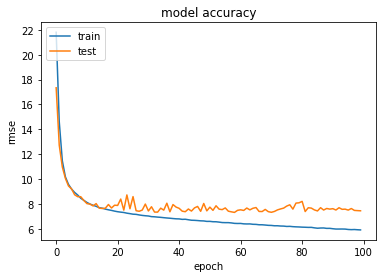

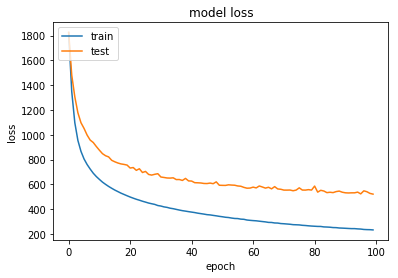

In [81]:
# list all data in history
print(h.history.keys())
# summarize history for accuracy
plt.plot(h.history['rmse'])
plt.plot(h.history['val_rmse'])
plt.title('model accuracy')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [114]:
# create model
model = Sequential()
model.add(Dense(256, kernel_initializer='normal', input_shape=(191, ), activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='linear'))
# Compile model
model.compile(loss='mse', optimizer='rmsprop', metrics=[rmse])
model.summary()
# model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               49152     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 86,209
Trainable params: 86,209
Non-trainable params: 0
_________________________________________________________________


In [116]:
h = model.fit(X, y, batch_size=256, epochs=100, verbose=1, validation_split=0.3)

Train on 122499 samples, validate on 52501 samples
Epoch 1/100
122499/122499 [==============================] - 1s 11us/step - loss: 4.7963e-05 - rmse: 0.0035 - val_loss: 6.7718e-05 - val_rmse: 0.0032
Epoch 2/100
122499/122499 [==============================] - 1s 11us/step - loss: 4.7027e-05 - rmse: 0.0035 - val_loss: 6.8865e-05 - val_rmse: 0.0035
Epoch 3/100
122499/122499 [==============================] - 1s 12us/step - loss: 4.6349e-05 - rmse: 0.0035 - val_loss: 8.1667e-05 - val_rmse: 0.0035
Epoch 4/100
122499/122499 [==============================] - 1s 12us/step - loss: 4.5632e-05 - rmse: 0.0035 - val_loss: 7.5153e-05 - val_rmse: 0.0034
Epoch 5/100
122499/122499 [==============================] - 2s 13us/step - loss: 4.5433e-05 - rmse: 0.0034 - val_loss: 8.7070e-05 - val_rmse: 0.0057
Epoch 6/100
122499/122499 [==============================] - 1s 11us/step - loss: 4.5566e-05 - rmse: 0.0034 - val_loss: 9.0646e-05 - val_rmse: 0.0035
Epoch 7/100
122499/122499 [======================

dict_keys(['val_loss', 'val_rmse', 'loss', 'rmse'])


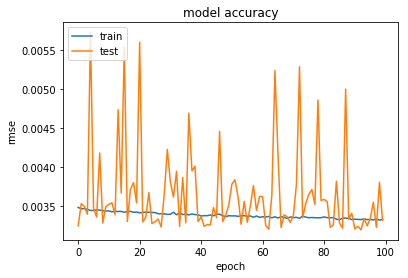

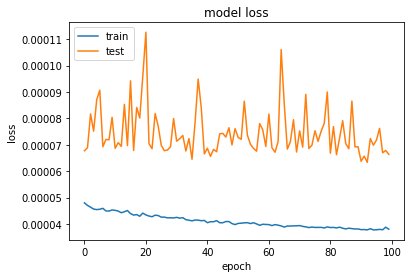

In [117]:
# list all data in history
print(h.history.keys())
# summarize history for accuracy
plt.plot(h.history['rmse'])
plt.plot(h.history['val_rmse'])
plt.title('model accuracy')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.predict(test_X)

In [82]:
test_label = model.predict(test_X)

In [83]:
test_label[0:10]

array([[88.47161 ],
       [39.049572],
       [38.994774],
       [26.081257],
       [16.926132],
       [15.086194],
       [11.542691],
       [11.137124],
       [11.312036],
       [49.740685]], dtype=float32)

In [87]:
test_label.shape, test_df.shape

((83210, 1), (83210, 191))

In [90]:
# Submissions to kaggle
from submission_nn import submit
submit(test_label, test_df)

Fist 10 predictions: [[88.47161 ]
 [39.049572]
 [38.994774]
 [26.081257]
 [16.926132]
 [15.086194]
 [11.542691]
 [11.137124]
 [11.312036]
 [49.740685]]

Save path : submissions/submission_nn2.csv


In [102]:
# Submissions to kaggle
submit(test_label, test_df)

Fist 10 predictions: [array([120.07522], dtype=float32), array([139.18439], dtype=float32), array([120.97901], dtype=float32), array([114.827896], dtype=float32), array([109.36409], dtype=float32), array([110.338585], dtype=float32), array([136.86107], dtype=float32), array([108.49408], dtype=float32), array([147.27779], dtype=float32), array([113.8492], dtype=float32)]


In [103]:
!ls '/content/gdrive/My Drive/'

'Colab Notebooks'       Sample_Submission.csv   test_cleaned.csv    train.csv
 country_region.csv     submission_nn.csv       test.csv
'Getting started.pdf'   target_cleaned.csv      train_cleaned.csv
